#  환경부 기후 대기 사업 재정 데이터 시각화
## 장경준, 장동혁

## 목차
### Ⅰ.서론
#### 1) 선정배경
### Ⅱ.본론
#### 1. 환경부 예산 배정 현황
#### 2.
### Ⅲ.결론

# Ⅰ.서론
## 1)선정배경
지구 온난화로 세계 곳곳에서 폭염, 폭설, 태풍, 산불 등 이상기후 현상이 나타나고 있다.

["탄소 감축만이 살길"...기후변화 대응에 분주한 세계 각국](https://www.hani.co.kr/arti/society/environment/1007068.html)

유엔 기후변화 보고서에 따르면 지구 온난화는 "통제 불가능"한 상태에 가까워지고 있다. 세계 기후 전문가들은 향후 20년안에 지구의 평균 온도가 19세기 말보다 섭씨 1.5도 상승할 수 있다고 전망했다.(참고 : [https://www.bbc.com/korean/news-58155013](https://www.bbc.com/korean/news-58155013))

![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/0a6c477e-c02a-480b-9b38-0d7efbf37232/Untitled.png)

석탄,석유를 원료로 사용하는 화력 발전소를 필두로 화석연료 비중이 높은 제조업 중심의 산업구조를 가진 우리나라도 최근 30년간 기온이 1.4도 상승하며 온난화를 몸소 체감하고 있다.

이러한 급격한 기후변화에 대응하기 위해 국제사회는 1992년 UN 기후변화 협약을 채택한 것을 시작으로, 1997년 선진국에 탄소 배출량 저감 의무를 부여하는 '교토의정서'를 채택하였고, 2015년에는 선진국과 개도국 등 197개국이 참여하는 '파리기후협약'을 채택하였다.

우리나라 정부는 2016년 11월 파리협정을 비준하였고, 2030년까지 배출 전망치(BAU)대비 37% 감축을 목표로 정책을 시행하고 있다.

2020년에는 '2050 탄소중립 정책'을 발표하며 배출되는 탄소와 흡수되는 탄소량을 같게 해 순배출이 '0'이 되게 하는 "탄소 중립" 정책을 추진하고 있다.

특히 환경부는 '탄소중립' 정책의 주요 부처로서 탄소중립 사회로의 공정 전환을 위해 다양한 정책을 시행하고 있다.

<div class='tableauPlaceholder' id='viz1631166811516' style='position: relative'><noscript><a href='#'><img alt='재정데이터 시각화 경진대회 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;2W&#47;2WHZDRJZ8&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;2WHZDRJZ8' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;2W&#47;2WHZDRJZ8&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='ko-KR' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1631166811516');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [2]:
plt.rc('font', family='Malgun Gothic')
warnings.filterwarnings(action='ignore')

# Ⅱ.본론
# 1.환경부 예산 배정 현황
## 1. 년도별 환경부 예산 비율

In [3]:
budget_df = pd.read_csv(r"budget.csv")
budget_df.astype({'국회확정금액(천원)': 'int64'})

,회계년도,소관명,국회확정금액(천원)
0,2019,대통령비서실 및 국가안보실,40443000
1,2019,대통령비서실 및 국가안보실,19431000
2,2019,대통령비서실 및 국가안보실,16392000
3,2019,대통령비서실 및 국가안보실,4491000
4,2019,대통령비서실 및 국가안보실,4782000
...,...,...,...
24711,2021,가습기살균제사건과 4・16세월호참사 특별조사위원회,691000
24712,2021,가습기살균제사건과 4・16세월호참사 특별조사위원회,2371000
24713,2021,5・18민주화운동 진상규명조사위원회,2493000
24714,2021,5・18민주화운동 진상규명조사위원회,3672000


In [4]:
group_df = budget_df.groupby(["회계년도", "소관명"], as_index=False)["국회확정금액(천원)"].sum()

In [5]:
budget_sum = budget_df.groupby(['회계년도'], as_index=False)['국회확정금액(천원)'].sum().set_index('회계년도')

year = group_df['회계년도']
budget = group_df[group_df['소관명'].isin(['환경부', '산업통상자원부', '과학기술정보통신부', '농림축산식품부'])].set_index('회계년도')
budget['소관예산/전체예산(%)'] = round(budget['국회확정금액(천원)'].div(budget_sum['국회확정금액(천원)'])*100,2)

## 그래프1 : 최근 3개년 환경부 예산 추이

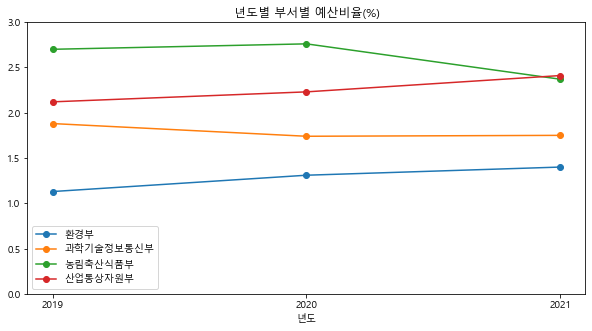

In [6]:
x_label = ['2019', '2020', '2021']
env_budget = budget[budget['소관명'] == '환경부']['소관예산/전체예산(%)']
sci_budget = budget[budget['소관명'] == '과학기술정보통신부']['소관예산/전체예산(%)']
for_budget = budget[budget['소관명'] == '농림축산식품부']['소관예산/전체예산(%)']
ind_budget = budget[budget['소관명'] == '산업통상자원부']['소관예산/전체예산(%)']

fig = plt.figure(figsize=(10,5))
plt.ylabel('')
plt.xlabel('년도')
plt.title('년도별 부서별 예산비율(%)')
plt.ylim(0, 3)
plt.plot(x_label, env_budget, label='환경부', marker='o')
plt.plot(x_label, sci_budget, label='과학기술정보통신부', marker='o')
plt.plot(x_label, for_budget, label='농림축산식품부', marker='o')
plt.plot(x_label, ind_budget, label='산업통상자원부', marker='o')
plt.legend(loc='best')
plt.show()

환경부 예산은 비슷한 규모의 부서에 비해 최근 3년간 증가 추세이다.

## 2. 환경부 부서별, 년도별 투자 비율

In [7]:
env_budget_df = pd.read_csv(r"env_budget.csv")
env_budget_df.astype({'국회확정금액(천원)': 'int64'})

,회계년도,소관명,부분명,프로그램명,단위사업명,프로그램명.1,국회확정금액(천원)
0,2019,환경부,환경일반,회계간거래(전출금),회계간전출,환경개선특별회계 전출,3166085000
1,2019,환경부,물류등기타,국토교통연구개발,건설기술혁신(R&D),물관리연구(R&D),17055000
2,2019,환경부,물류등기타,국토교통연구개발,건설기술혁신(R&D),수요대응형 물공급서비스 연구(R&D),4280000
3,2019,환경부,물류등기타,국토교통연구개발,건설기술혁신(R&D),지능형도시수자원관리(R&D),500000
4,2019,환경부,물류등기타,국토교통연구개발,플랜트연구,플랜트연구(R&D),11893000
...,...,...,...,...,...,...,...
1195,2021,환경부,환경일반,환경행정 지원,기금운영비(석면피해구제기금),정보화경비(정보화),155000
1196,2021,환경부,환경일반,여유자금운용,여유자금운용(석면피해구제기금),통화금융기관예치,16524000
1197,2021,환경부,기후대기및환경안전,환경보건관리,환경위해 관리,석면피해구제급여,17040000
1198,2021,환경부,기후대기및환경안전,환경보건관리,환경위해 관리,석면건강영향조사,742000


In [8]:
env_group_df = env_budget_df.groupby(["회계년도", "부분명"], as_index=False)["국회확정금액(천원)"].sum().set_index('회계년도')

In [9]:
env_budget_sum = env_budget_df.groupby(['회계년도'], as_index=False)['국회확정금액(천원)'].sum().set_index('회계년도')

env_group_df['부분예산/환경부예산(%)'] = round(env_group_df['국회확정금액(천원)'].div(env_budget_sum['국회확정금액(천원)'])*100,2)

In [10]:
env_group_df

,부분명,국회확정금액(천원),부분예산/환경부예산(%)
회계년도,,,
2019,기후대기및환경안전,1380776000,11.88
2019,물류등기타,60054000,0.52
2019,물환경,4072467000,35.04
2019,산업단지,39741000,0.34
2019,수자원,640187000,5.51
2019,자연환경,637910000,5.49
2019,자원순환및환경경제,670763000,5.77
2019,환경일반,4120986000,35.46
2020,기후대기및환경안전,2709636000,17.93


## 그래프2 : 년도별 환경부 분야별 예산 책정 비율

<div class='tableauPlaceholder' id='viz1631164329102' style='position: relative'><noscript><a href='#'><img alt='대시보드 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;3_&#47;3_16310763144560&#47;1_1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='3_16310763144560&#47;1_1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;3_&#47;3_16310763144560&#47;1_1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='ko-KR' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1631164329102');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='970px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='970px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
기후대기 및 환경안전 예산은 증가추세이다.

## 표1 : 환경부 부분별 세부 프로그램 예산

<div class='tableauPlaceholder' id='viz1631164341970' style='position: relative'><noscript><a href='#'><img alt='대시보드 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;4_&#47;4_16311076220830&#47;3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='4_16311076220830&#47;3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;4_&#47;4_16311076220830&#47;3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='ko-KR' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1631164341970');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='900px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='900px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='977px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [11]:
car_df = pd.read_csv(r"car.csv")
car_df.drop(columns=['월'], axis=1, inplace=True)
car_df.astype({'계': 'int64'})

,연도,연료별,계
0,2018,전기,9564
1,2018,CNG,9635
2,2018,수소,84
3,2018,전체,3124651
4,2018,전기,9329
...,...,...,...
139,2020,전체,3123984
140,2020,전기,15353
141,2020,CNG,9429
142,2020,수소,603


In [12]:
car_group_df = car_df.groupby(['연도', '연료별']).sum().reset_index()
car_group_df

,연도,연료별,계
0,2018,CNG,116131
1,2018,수소,470
2,2018,전기,81743
3,2018,전체,37452115
4,2019,CNG,114846
5,2019,수소,2832
6,2019,전기,138614
7,2019,전체,37482771
8,2020,CNG,112274
9,2020,수소,13142


## 그래프3 : 연료별 자동차 등록 대수

<div class='tableauPlaceholder' id='viz1631164360922' style='position: relative'><noscript><a href='#'><img alt='대시보드 4 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;5_&#47;5_16311077210600&#47;4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='5_16311077210600&#47;4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;5_&#47;5_16311077210600&#47;4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='ko-KR' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1631164360922');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='950px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='950px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
연료별 자동차 등록대수를 살펴보면
최근 3년간 전기차는 증가 추세이고, CNG(천연가스) 3년간 유지 감소추세이다,
수소차는 최근 새로 생겨나 비교적 적은 비중이지만 꾸준히 증가하고 있다.

## 그래프4 : 주요국 에너지 정책 현황과 목표

<div class='tableauPlaceholder' id='viz1631164369251' style='position: relative'><noscript><a href='#'><img alt='대시보드 5 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;6_&#47;6_16311122730080&#47;5&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='6_16311122730080&#47;5' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;6_&#47;6_16311122730080&#47;5&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='ko-KR' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1631164369251');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='950px';vizElement.style.height='677px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='950px';vizElement.style.height='677px';} else { vizElement.style.width='100%';vizElement.style.height='777px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
주요 선진국들의 에너지 정책 현황을 살펴보면, 2030년 목표 계획에서 전체적으로 신재생에너지 비중이 증가했음을 알 수 있다.
특히 독일, 프랑스, 우리나라의 경우 점진적으로 화력,원자력 발전의 비중을 줄이고 신재생에너지가 주력이 되는 정책을 시행하고 있다.

## 그래프5

In [13]:
co2_df = pd.read_csv(r"co2.csv")
co2_df.sort_values(by=['배출량(단위:MtCO2)'],ascending=True, inplace=True)
co2_df

,국가,배출량(단위:MtCO2)
11,남아프리카공화국,395
10,사우디아라비아,492
9,캐나다,516
8,인도네시아,566
7,대한민국,570
6,독일,617
5,이란,619
4,일본,979
3,러시아,1619
2,인도,2191


In [14]:
x_label = co2_df['국가']
y_emit = co2_df['배출량(단위:MtCO2)']
colors = sns.color_palette('tab10')

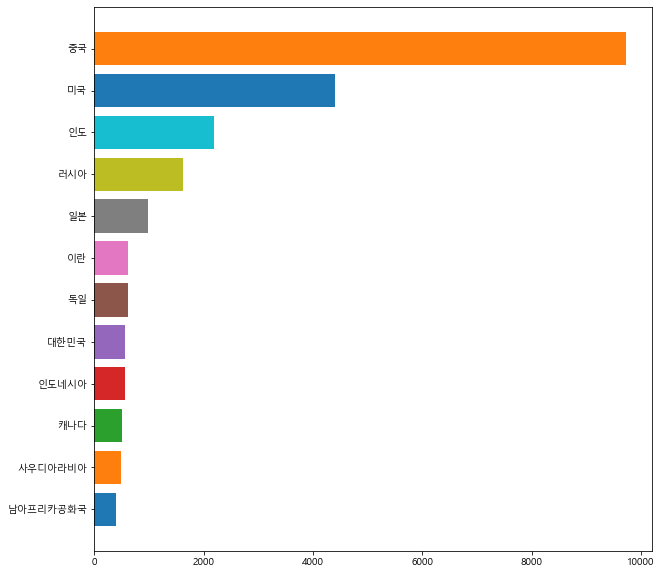

In [15]:
fig = plt.figure(figsize=(10,10))
plt.title('국가별 이산화탄소 배출량 순위(2020년)')
plt.barh(x_label, y_emit, color=colors)
plt.show()

# 원본 데이터

url: 구글 드라이브에 저장된 csv 파일들

# 출처

데이터 출처

# 추가할 것

- 국내 온실가스 총 배출량 및 증가량
- Tableau, python 그래프 색 통일
- 개요 작성
- wordcloud

# 전처리

이하 코드는 공공 재정데이터 API호출 및 전처리를 위한 소스코드입니다. 해당 코드를 사용해 데이터 전처리 및 저장해 시각화에 사용했습니다.

In [ ]:
import pandas as pd
import requests

from bs4 import BeautifulSoup

In [ ]:
# 재정데이터 받아오기
pIndex = 1
rows = []
years = ['2019', '2020', '2021']

# 공공데이터 API 호출을 위한 개인 private key
key = "CHANGE ME"

# 데이터 받아오기
try:
    for year in years:
        print(year + "년도 예산 데이터 받아오는중...")
        pIndex = 1
        
        for _ in range(10):
            url = f"http://openapi.openfiscaldata.go.kr/ExpenditureBudgetInit3?FSCL_YY={year}&pSize=1000&Key={key}&pIndex={pIndex}"
            
            res = requests.get(url)
            soup = BeautifulSoup(res.content, 'html.parser')

            for i in soup.find_all('row'):
                rows.append({"FSCL_YY": i.fscl_yy.string,
                             "OFFC_NM": i.offc_nm.string,
                             "Y_YY_DFN_MEDI_KCUR_AMT": i.y_yy_dfn_medi_kcur_amt.string})
            pIndex += 1
            
        print("완료")

except requests.exceptions.RequestException as e:
    print(e)
            
budget_df = pd.DataFrame(rows)
budget_df.columns = ["회계년도", "소관명", "국회확정금액(천원)"]

In [ ]:
budget_df.to_csv("./budget.csv", index=False)

In [ ]:
# 재정데이터 중 환경부 예산 받아오기
pIndex = 1
rows = []
years = ['2019', '2020', '2021']

try:
    for year in years:
        print(year + "년도 환경부 예산 데이터 받아오는중...")
        pIndex = 1
        
        for _ in range(10):
            url = f"http://openapi.openfiscaldata.go.kr/ExpenditureBudgetInit3?OFFC_NM=환경부&FSCL_YY={year}&pSize=1000&Key={key}&pIndex={pIndex}"
            
            res = requests.get(url)
            soup = BeautifulSoup(res.content, 'html.parser')

            for i in soup.find_all('row'):
                rows.append({"FSCL_YY": i.fscl_yy.string,
                             "OFFC_NM": i.offc_nm.string,
                             "SECT_NM": i.sect_nm.string,
                             "PGM_NM": i.pgm_nm.string,
                             "ACTV_NM": i.actv_nm.string,
                             "SACTV_NM": i.sactv_nm.string,
                             "Y_YY_DFN_MEDI_KCUR_AMT": i.y_yy_dfn_medi_kcur_amt.string})
            pIndex += 1
            
        print("완료")

except requests.exceptions.RequestException as e:
    print(e)
    
env_budget_df = pd.DataFrame(rows)
env_budget_df.columns = ["회계년도", "소관명", "부분명", "프로그램명", "단위사업명", "프로그램명", "국회확정금액(천원)"]

In [ ]:
env_budget_df.to_csv("./env_budget.csv", index=False)